In [1]:
# import the needed packages and check version
import tensorflow as tf
from tensorflow import keras
import tensorflow_probability as tfp

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("tensorflow: ", tf.__version__) #2.0.0
print("tensorflow_prob: ", tfp.__version__) #

tensorflow:  2.0.0
tensorflow_prob:  0.8.0


In [2]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [3]:
#import the fashion mnist dataset (from Zalando)
fashion_mnist = keras.datasets.fashion_mnist
data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#preprocess the images
train_x = np.expand_dims(train_images/255.0, axis=3)
test_x = np.expand_dims(test_images/255.0, axis=3)

In [6]:
train_y = train_labels
test_y = test_labels

In [7]:
print(test_y.shape)
test_y_ohe = np.array(pd.get_dummies(np.array(test_y)))

(10000,)


# Miminimze one class

In [8]:
# define function to select only specific category
def select_max_category(data, label, category, max_nr_for_category):
    new_data = []
    new_label = []
    for i in range(len(label)):
        if label[i] == category:
            if len(new_label) <= max_nr_for_category-1:
                new_label.append(label[i])
                new_data.append(data[i])
    #new_data = np.array(new_data)
    #new_label = np.array(new_label)
    return new_data, new_label

In [9]:
#create an array with only the "small class"
all_one_x = train_x[np.where(train_y==1)[0]]
all_one_y = train_y[np.where(train_y==1)[0]]
print(all_one_x.shape, all_one_y.shape)

(6000, 28, 28, 1) (6000,)


In [10]:
#create a set with only zeros in it for experimenting
all_zero_x = test_x[np.where(test_y==0)[0]]
all_zero_y = test_y[np.where(test_y==0)[0]]

In [11]:
# select some pictures of class 1 and define how many
# in the original dataset 7000 images per class are available
rate = 0.005
one_x, one_y = select_max_category(train_x, train_y, 1, 6000*rate)

In [12]:
one_x = np.array(one_x)
one_x.shape

(30, 28, 28, 1)

In [13]:
one_y = np.array(one_y)
one_y.shape

(30,)

In [14]:
#delete class 1 from the training set
train_x = np.delete(train_x, np.where(train_y==1)[0], axis = 0)
print(train_x.shape)

(54000, 28, 28, 1)


In [15]:
train_y = np.delete(train_y, np.where(train_y==1)[0], axis = 0)
print(train_y.shape)

(54000,)


In [16]:
train_x = np.append(train_x, one_x, axis=0)
train_y = np.append(train_y, one_y, axis=0)
#train_y = np.array(pd.get_dummies(train_y)) #onehotencoding

In [17]:
print(train_x.shape, train_y.shape)

(54030, 28, 28, 1) (54030,)


In [18]:
#shuffle the data
n = train_x.shape[0]
## numpy has a shuffle method
permutation = np.arange(n) #n = number of pictures/length of data
np.random.shuffle(permutation)
    
train_x = [train_x[i] for i in permutation]
train_y = [train_y[i] for i in permutation]
#labels_ohe_shuffled = [labels_ohe[i] for i in permutation]

train_x = np.array(train_x)
train_y = np.array(train_y)

train_y = np.array(pd.get_dummies(train_y)) #onehotencoding

In [19]:
print(train_x.shape)
print(train_y.shape)

(54030, 28, 28, 1)
(54030, 10)


# Construct a baseline CNN

In [22]:
model = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.5)),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [24]:
history = model.fit(train_x, train_y, epochs = 10)

Epoch 1/10
54030/54030 [==============================] - 40s 746us/sample - loss: 0.5128 - acc: 0.8144
Epoch 2/10
54030/54030 [==============================] - 46s 856us/sample - loss: 0.3613 - acc: 0.8694
Epoch 3/10
54030/54030 [==============================] - 49s 904us/sample - loss: 0.3202 - acc: 0.8842
Epoch 4/10
54030/54030 [==============================] - 46s 852us/sample - loss: 0.2953 - acc: 0.8929
Epoch 5/10
54030/54030 [==============================] - 49s 906us/sample - loss: 0.2799 - acc: 0.8986
Epoch 6/10
54030/54030 [==============================] - 52s 968us/sample - loss: 0.2710 - acc: 0.9022
Epoch 7/10
54030/54030 [==============================] - 47s 872us/sample - loss: 0.2632 - acc: 0.9034
Epoch 8/10
54030/54030 [==============================] - 42s 786us/sample - loss: 0.2553 - acc: 0.9075
Epoch 9/10
54030/54030 [==============================] - 46s 852us/sample - loss: 0.2485 - acc: 0.9082
Epoch 10/10
54030/54030 [==============================] - 50s 9

In [26]:
model.save('B_003_model_b.h5') #save the model for the scrumbled data

In [20]:
model = tf.keras.models.load_model('B_003_model_b.h5')

W1206 13:13:17.935049  5612 deprecation.py:506] From C:\Users\annar\Anaconda3\envs\ml_env\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


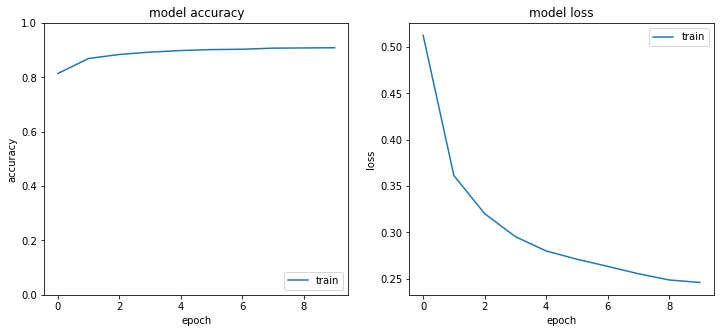

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [35]:
model.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 3s 262us/sample - loss: 0.3419 - acc: 0.8975


[0.3418784276366234, 0.8975]

# Check the baseline model for a rarely seen picture

In [21]:
picture = 100
picture_end = picture + 1

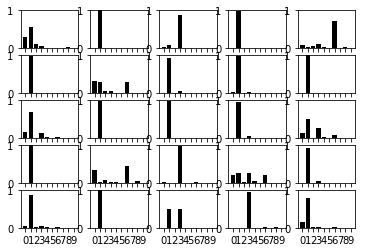

In [22]:
all_one_x.shape
for i in range(800,825,1):
    j = 1+i
    k = i-799
    prediction = model.predict([all_one_x[i:j], 1])[0]
    x = [0,1,2,3,4,5,6,7,8,9]
    plt.subplot(5,5,k)
    plt.bar(x,prediction, color = ['black']) #color=(0.3,0.3,0.3,1.0)
    plt.xticks(x)
    plt.ylim(0,1.0)
    #plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.title('probabilities predicted')

Text(0.5, 1.0, 'image')

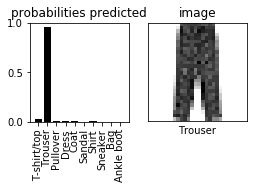

In [23]:
prediction = model.predict([all_one_x[picture:picture_end], 1])[0]
x = [0,1,2,3,4,5,6,7,8,9]
plt.subplot(2,3,1)
plt.bar(x,prediction, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('probabilities predicted')

plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(all_one_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[all_one_y[picture]])
plt.title('image')

# Create a model with Variational Inference

In [24]:
kernel_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (train_x.shape[0] *1.0)

In [25]:
model_vi = keras.Sequential([
    tfp.layers.Convolution2DFlipout(8, kernel_size=(3,3), padding="same", activation='relu', 
                                    kernel_divergence_fn=kernel_divergence_fn, input_shape=(28,28,1)),
    tfp.layers.Convolution2DFlipout(8, kernel_size=(3,3), padding="same", activation='relu', 
                                    kernel_divergence_fn = kernel_divergence_fn),
    keras.layers.MaxPooling2D(2,2),
    tfp.layers.Convolution2DFlipout(16, kernel_size=(3,3), padding="same", activation='relu', 
                                    kernel_divergence_fn=kernel_divergence_fn),
    keras.layers.Flatten(),
    #keras.layers.Dropout((0.5)),
    tfp.layers.DenseFlipout(10, activation='softmax', kernel_divergence_fn=kernel_divergence_fn)
])

model_vi.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_vi.summary()

W1206 13:13:51.647676  5612 deprecation.py:323] From C:\Users\annar\Anaconda3\envs\ml_env\lib\site-packages\tensorflow_probability\python\layers\util.py:104: Layer.add_variable (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.add_weight` method instead.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_flipout (Conv2DFlipou (None, 28, 28, 8)         152       
_________________________________________________________________
conv2d_flipout_1 (Conv2DFlip (None, 28, 28, 8)         1160      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_flipout_2 (Conv2DFlip (None, 14, 14, 16)        2320      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_flipout (DenseFlipout) (None, 10)                62730     
Total params: 66,362
Trainable params: 66,362
Non-trainable params: 0
____________________________________________________

In [28]:
history_vi = model_vi.fit(train_x, train_y, epochs = 10)

Train on 54030 samples
Epoch 1/10
54030/54030 [==============================] - 107s 2ms/sample - loss: 2.0132 - accuracy: 0.7746
Epoch 2/10
54030/54030 [==============================] - 100s 2ms/sample - loss: 1.5533 - accuracy: 0.8499
Epoch 3/10
54030/54030 [==============================] - 93s 2ms/sample - loss: 1.3293 - accuracy: 0.8685
Epoch 4/10
54030/54030 [==============================] - 94s 2ms/sample - loss: 1.1944 - accuracy: 0.8800
Epoch 5/10
54030/54030 [==============================] - 94s 2ms/sample - loss: 1.0941 - accuracy: 0.8874
Epoch 6/10
54030/54030 [==============================] - 79s 1ms/sample - loss: 1.0111 - accuracy: 0.8936
Epoch 7/10
54030/54030 [==============================] - 84s 2ms/sample - loss: 0.9442 - accuracy: 0.8977
Epoch 8/10
54030/54030 [==============================] - 110s 2ms/sample - loss: 0.8910 - accuracy: 0.9009 - loss: 0.8911 - accuracy: 0.90
Epoch 9/10
54030/54030 [==============================] - 102s 2ms/sample - loss: 0.84

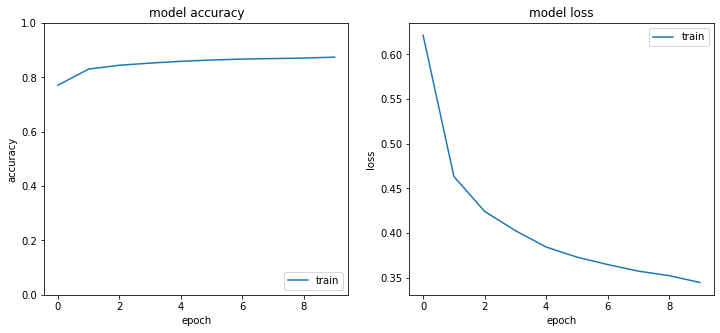

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_vi.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_vi.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [29]:
model_vi.save('B_005_model_vi.h5')

In [26]:
#model_vi = tf.keras.models.load_model('B_004_model_vi.h5')
model_vi.load_weights('B_005_model_vi.h5')

In [27]:
model_vi.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 6s 565us/sample - loss: 0.9593 - accuracy: 0.8665


[0.9592667919158936, 0.8665]

## predictions for a rarely seen image (trousers)

In [32]:
picture = 100
picture_end = picture+1
model_vi.predict(all_one_x[picture:picture_end])

array([[2.9954883e-01, 2.6293096e-01, 1.8965791e-03, 1.1289555e-01,
        3.1727666e-01, 5.4360311e-07, 4.7892905e-03, 1.5620088e-08,
        1.4056070e-04, 5.2107900e-04]], dtype=float32)

(100, 10)


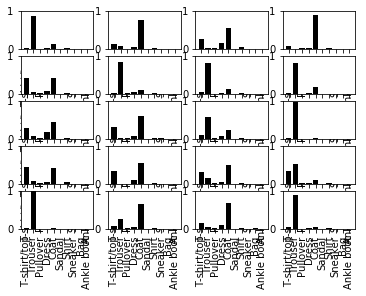

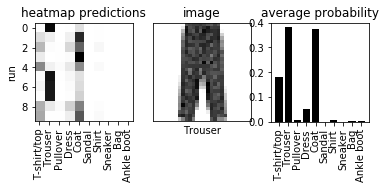

[1.7840275e-01 3.8051784e-01 5.2391393e-03 5.2385177e-02 3.7458056e-01
 4.5672528e-05 8.0932658e-03 9.7228178e-05 4.2407936e-04 2.1420984e-04]


In [33]:
x = [0,1,2,3,4,5,6,7,8,9]
predictions = model_vi.predict(all_one_x[picture:picture_end])
for i in range(700,799,1):
    pred = model_vi.predict(all_one_x[picture:picture_end])
    #print(pred)
    predictions = np.append(predictions, pred, axis = 0)
    #print(i, predictions)

print(predictions.shape)

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()

plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:10], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(all_one_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[all_one_y[picture]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
#x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

## prediction for an often seen image (class 0)

(100, 10)


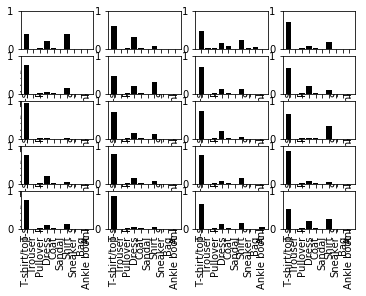

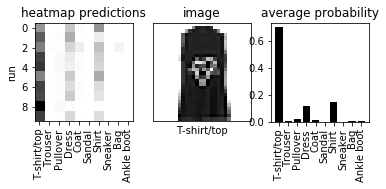

[6.9994736e-01 3.0099081e-03 1.6286165e-02 1.1597443e-01 1.5083456e-02
 2.3168312e-05 1.4743833e-01 1.3332159e-04 1.4082703e-03 6.9566281e-04]


In [34]:
x = [0,1,2,3,4,5,6,7,8,9]
predictions = model_vi.predict(all_zero_x[picture:picture_end])
for i in range(700,799,1):
    pred = model_vi.predict(all_zero_x[picture:picture_end])
    #print(pred)
    predictions = np.append(predictions, pred, axis = 0)
    #print(i, predictions)

print(predictions.shape)

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()

plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:10], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(all_zero_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[all_zero_y[picture]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
#x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

# Check and quantify the BNN 

## evaluate baseline CNN

In [39]:
# evaluate the baseline CNN on the test dataset
test_y_ohe = np.array(pd.get_dummies(test_y))
model.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 2s 215us/sample - loss: 0.3419 - accuracy: 0.8975


[0.3418784363389015, 0.8975]

In [40]:
# evaluate the baseline CNN on the rarely seen pictures only
l = []
for i in range(all_one_x.shape[0]):
    pred = model.predict(all_one_x[i:i+1])
    l.append(pred.argmax())

In [41]:
(l == all_one_y).sum()/all_one_x.shape[0]

0.8386666666666667

## evaluate the BNN with the standard prediction method

In [42]:
test_y_ohe = np.array(pd.get_dummies(test_y))
model_vi.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 5s 541us/sample - loss: 0.9556 - accuracy: 0.8723


[0.9556285731315612, 0.8723]

In [44]:
# evaluate the BNN with standard prediction on the rarely seen pictures only
l = []
for i in range(all_one_x.shape[0]):
    pred = model_vi.predict(all_one_x[i:i+1])
    l.append(pred.argmax())

In [45]:
(l == all_one_y).sum()/all_one_x.shape[0]

0.7001666666666667

# evaluate the BNN with special prediction method

In [29]:
#import the helper functions for evaluation
from helper_functions import m_predict_vi as apvi 
from helper_functions import b_predict_vi as bpvi

In [30]:
list_of_predictions = [5, 10, 25]
list_of_dev = [0.1, 0.2, 0.3, 0.4, 0.5]

## Bernoulli predict

In [57]:
# test without taking uncertainty into consideration
# for 5, 10, 25, 50 and 100 predictions per image
pred = bpvi.bern_predict_vi(test_x, model_vi, 10, 5)

In [58]:
import pandas as pd
p = pd.DataFrame(pred)
p['soll'] = test_y
p.to_csv("B_005_test_set_with_predictions_25.csv", ";")

In [59]:
#just the predictions:
(p[0] == test_y).sum()/test_x.shape[0]

0.8902

In [60]:
#for different uncertainty levels
for i in list_of_dev:
    p['unc_est'] = np.where(p[3] >= i, 1, p[0])
    w = (p['unc_est'] == test_y).sum()/test_x.shape[0]
    print(i, ": " , w)

0.1 :  0.7646
0.2 :  0.7646
0.3 :  0.825
0.4 :  0.8485
0.5 :  0.885


In [61]:
#evaluate with ranges
for i in list_of_dev:
    for j in list_of_dev:
        if j>i:
                p['unc_est'] = np.where(((p[3] >= i) & (p[3]<=j)), 1, p[0])
                w = (p['unc_est'] == test_y).sum()/test_x.shape[0]
                print(i, "-", j, ": " , w)
            

0.1 - 0.2 :  0.8502
0.1 - 0.3 :  0.8298
0.1 - 0.4 :  0.798
0.1 - 0.5 :  0.7646
0.2 - 0.3 :  0.8298
0.2 - 0.4 :  0.798
0.2 - 0.5 :  0.7646
0.3 - 0.4 :  0.8584
0.3 - 0.5 :  0.825
0.4 - 0.5 :  0.8485


### graphic

In [2]:
x = [5, 10, 25]
y = [0.8813, 0.8869, 0.8902]
y50 = [0.8813, 0.883, 0.885]
y40 = [0.8255, 0.8401, 0.8485]
y30 = [0.8255, 0.7993, 0.825]
y20 = [0.8255, 0.7993, 0.7647]
y10 = [0.8255, 0.7993, 0.7647]

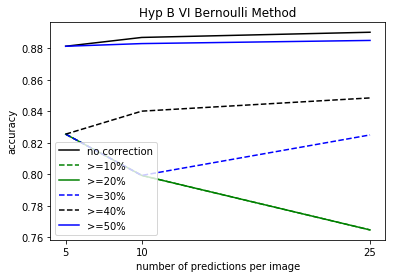

In [4]:
import matplotlib.pyplot as plt

plt.plot(x,y, label='no correction', color='black')
plt.plot(x, y10, label='>=10%', color='green', linestyle='--')
plt.plot(x, y20, label='>=20%', color='green', linestyle='-')
plt.plot(x, y30, label='>=30%', color='blue', linestyle='--')
plt.plot(x, y40, label='>=40%', color='black', linestyle='--')
plt.plot(x, y50, label='>=50%', color='blue', linestyle='-')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(x)
#plt.yticks(list_of_dev)

plt.legend(loc='lower left')
plt.title("Hyp B VI Bernoulli Method")
plt.show()

## Average prediction

In [68]:
list_of_predictions = [5, 10, 25, 50, 100]
list_of_dev = [0.1, 0.2, 0.3, 0.4, 0.5]

In [ ]:
pred = apvi.average_predict_vi(test_x, model_vi, 10, 25)

In [77]:
df = pd.DataFrame(pred)
df['soll'] = test_y
df.to_csv("B_005_test_with_max_pred_25.csv", ";")

C:\Users\annar\Anaconda3\envs\ml_env\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


In [78]:
#just the predictions:
(df[0] == test_y).sum()/test_x.shape[0]

0.889

In [79]:
#for different uncertainty levels
for i in list_of_dev:
    df['unc_est'] = np.where(df[3] >= i, 1, df[0])
    w = (df['unc_est'] == test_y).sum()/test_x.shape[0]
    print(i, ": " , w)

0.1 :  0.7232
0.2 :  0.866
0.3 :  0.8913
0.4 :  0.889
0.5 :  0.889


In [80]:
#evaluate with ranges
for i in list_of_dev:
    for j in list_of_dev:
        if j>i:
                df['unc_est'] = np.where(((df[3] >= i) & (df[3]<=j)), 1, df[0])
                w = (df['unc_est'] == test_y).sum()/test_x.shape[0]                
                print(i, "-", j, ": " , w)
            

0.1 - 0.2 :  0.7462
0.1 - 0.3 :  0.7209
0.1 - 0.4 :  0.7232
0.1 - 0.5 :  0.7232
0.2 - 0.3 :  0.8637
0.2 - 0.4 :  0.866
0.2 - 0.5 :  0.866
0.3 - 0.4 :  0.8913
0.3 - 0.5 :  0.8913
0.4 - 0.5 :  0.889


### graphic

In [5]:
x = [5, 10, 25]
y = [0.8851, 0.8873, 0.889]
y50 = [0.8851, 0.8873, 0.889]
y40 = [0.8852, 0.8873, 0.889]
y30 = [0.884, 0.8879, 0.8913]
y20 = [0.8547, 0.8583, 0.866]
y10 = [0.7515, 0.734, 0.7232]

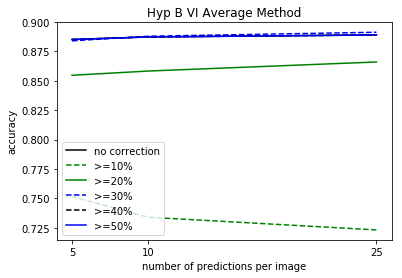

In [6]:
import matplotlib.pyplot as plt

plt.plot(x, y, label='no correction', color='black')
plt.plot(x, y10, label='>=10%', color='green', linestyle='--')
plt.plot(x, y20, label='>=20%', color='green', linestyle='-')
plt.plot(x, y30, label='>=30%', color='blue', linestyle='--')
plt.plot(x, y40, label='>=40%', color='black', linestyle='--')
plt.plot(x, y50, label='>=50%', color='blue', linestyle='-')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(x)
#plt.yticks(list_of_dev)

plt.legend(loc='lower left')
plt.title("Hyp B VI Average Method")
plt.show()